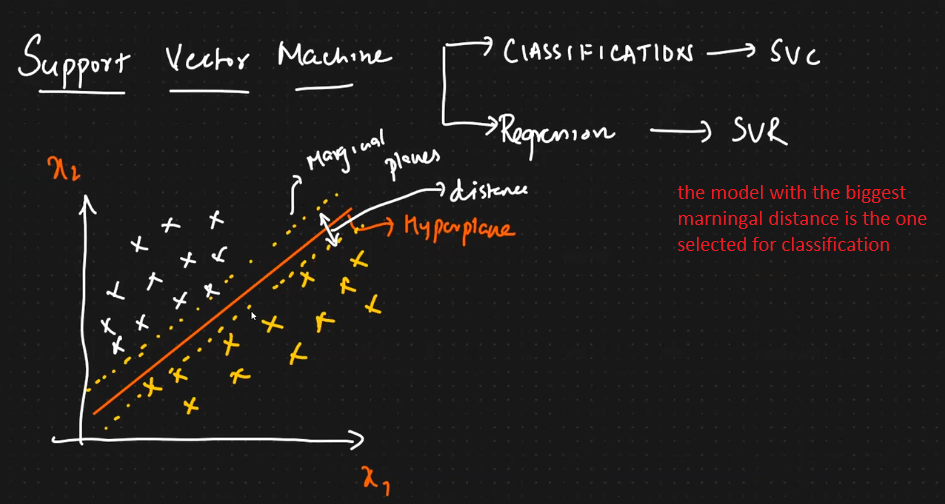

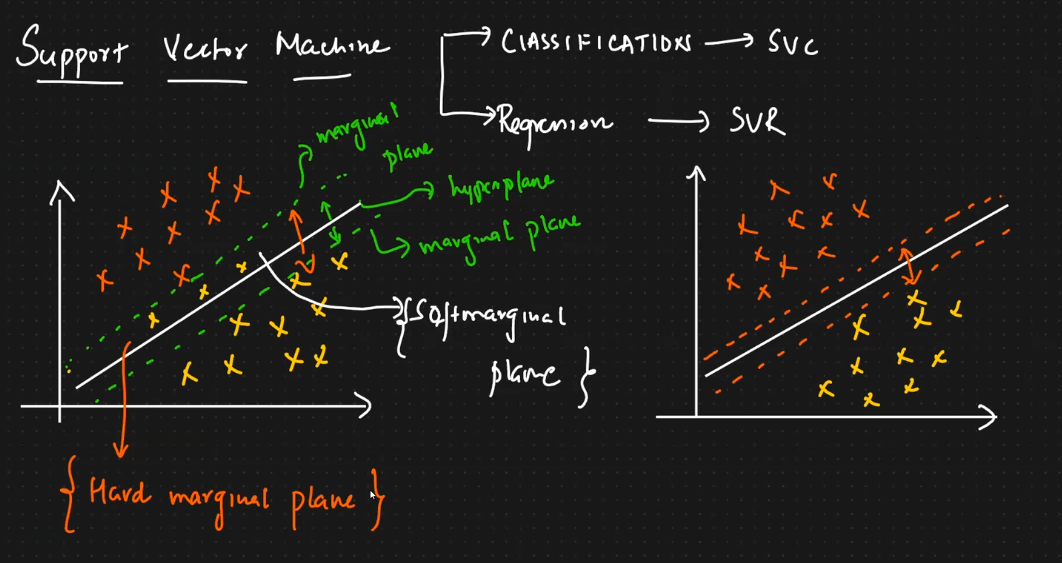

* soft  marginal plane allows for some errors, which will help to overcome overfitting issues

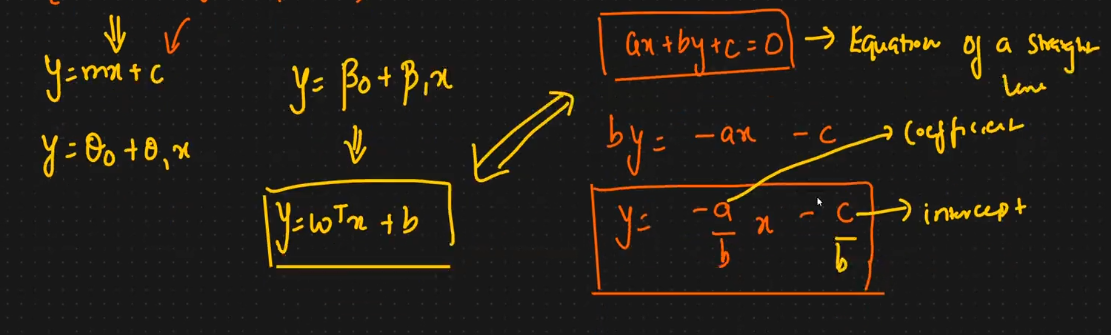

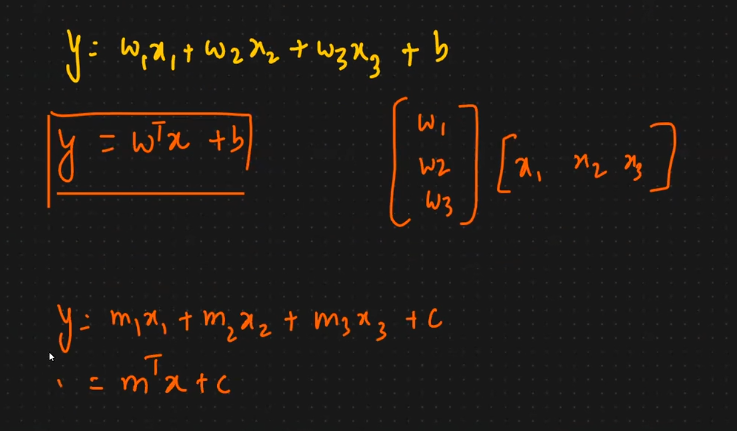

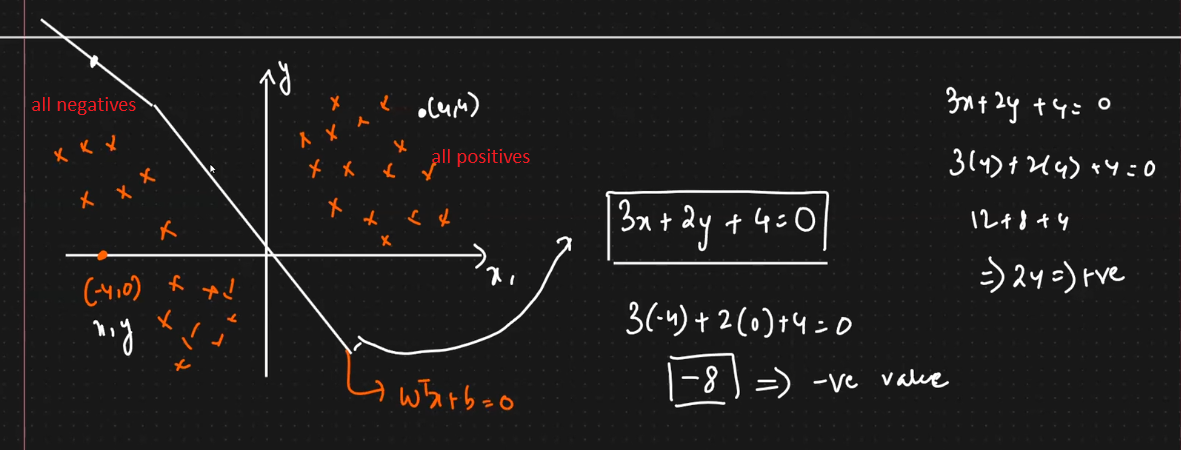


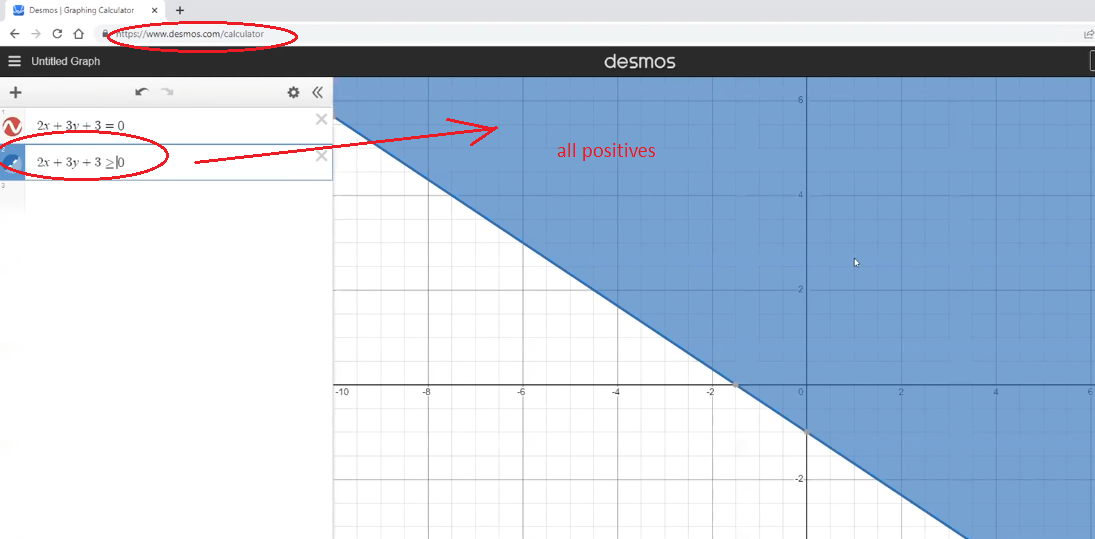

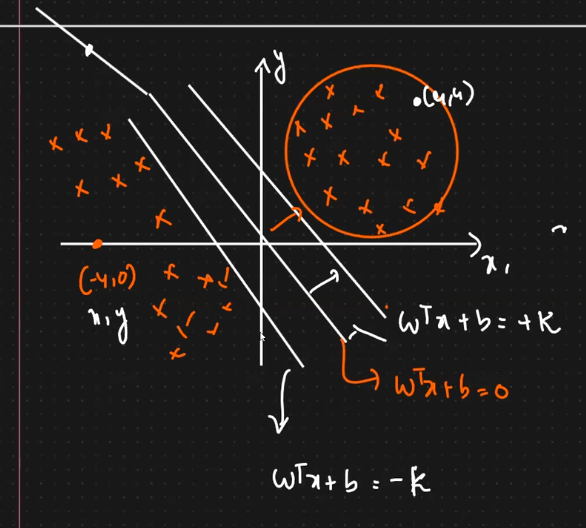

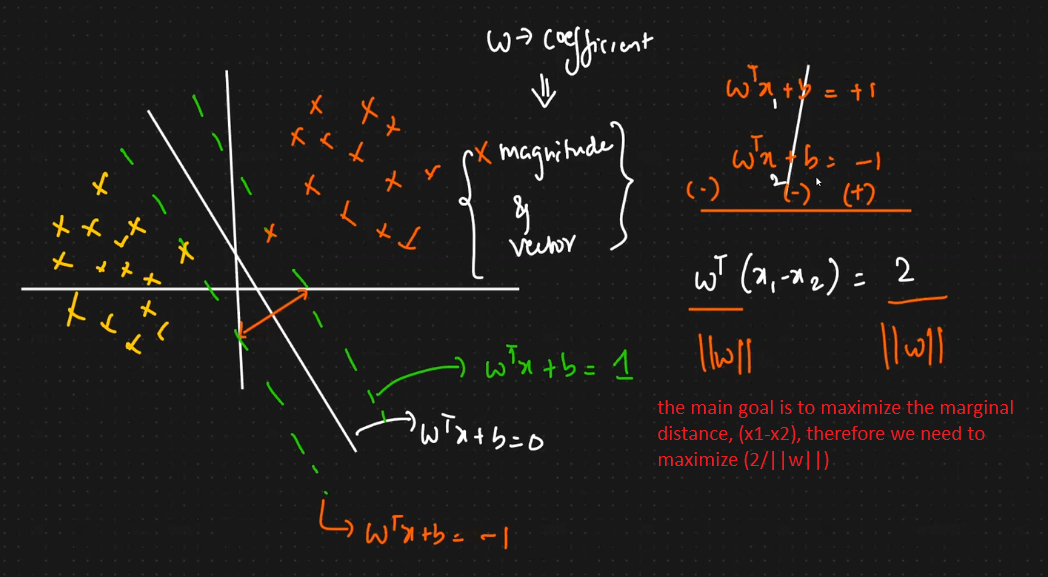

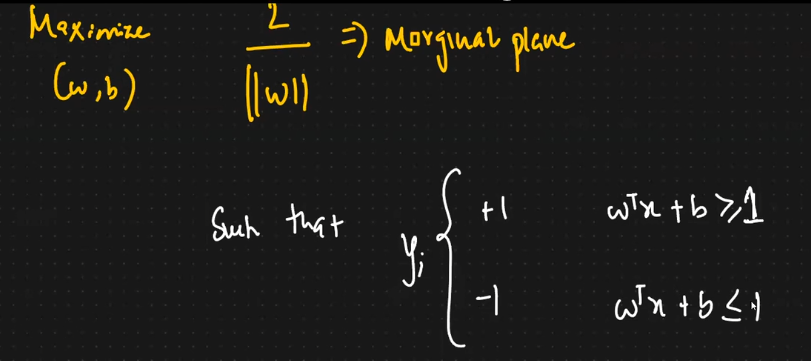

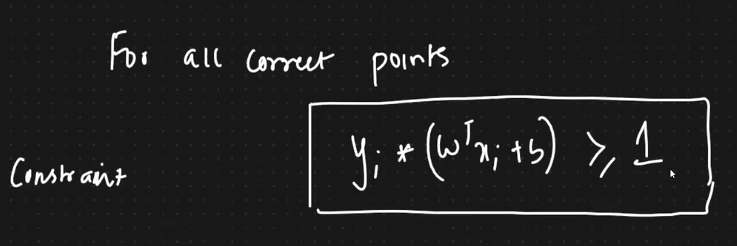

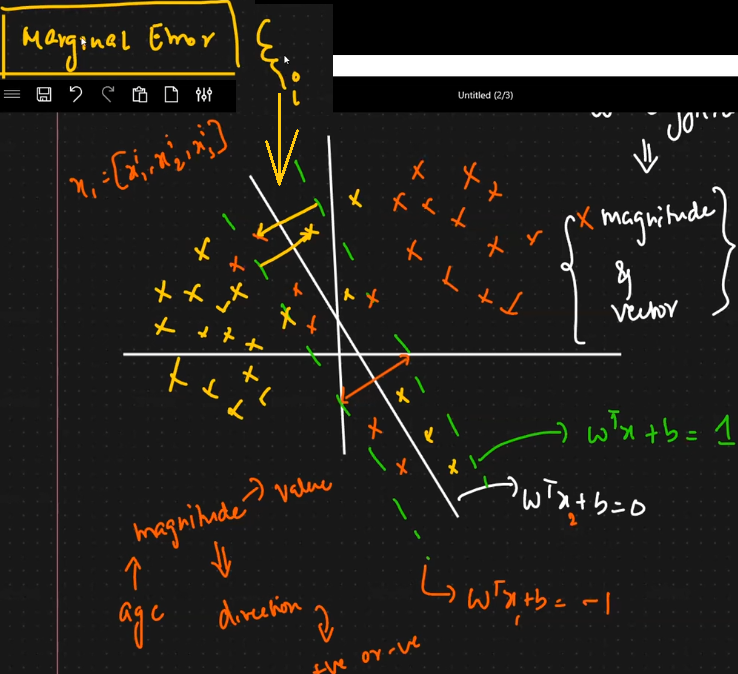

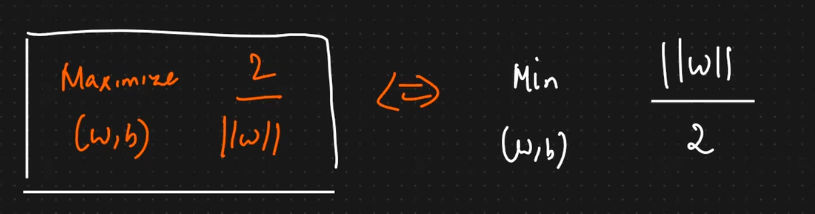

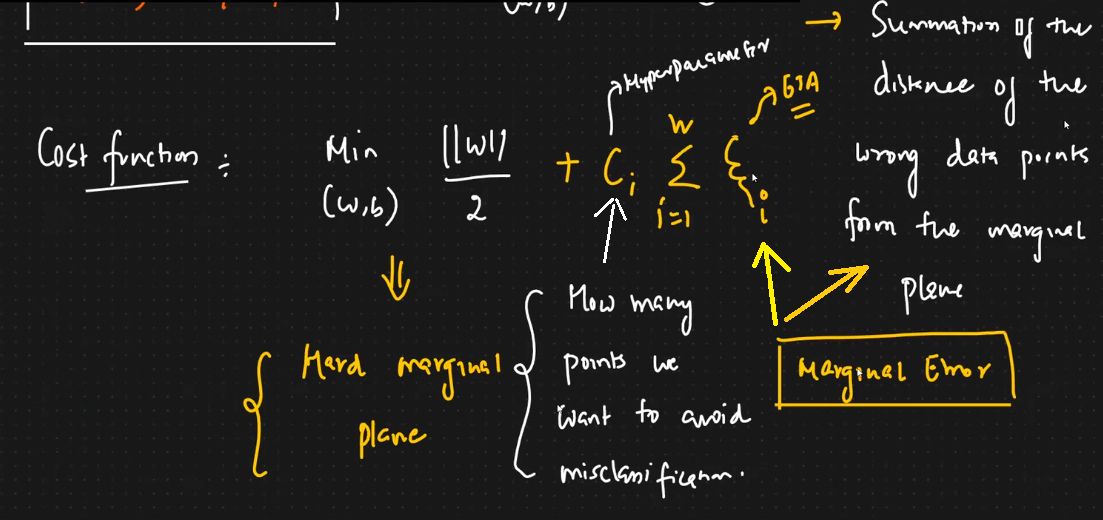

# Support Vector Regression

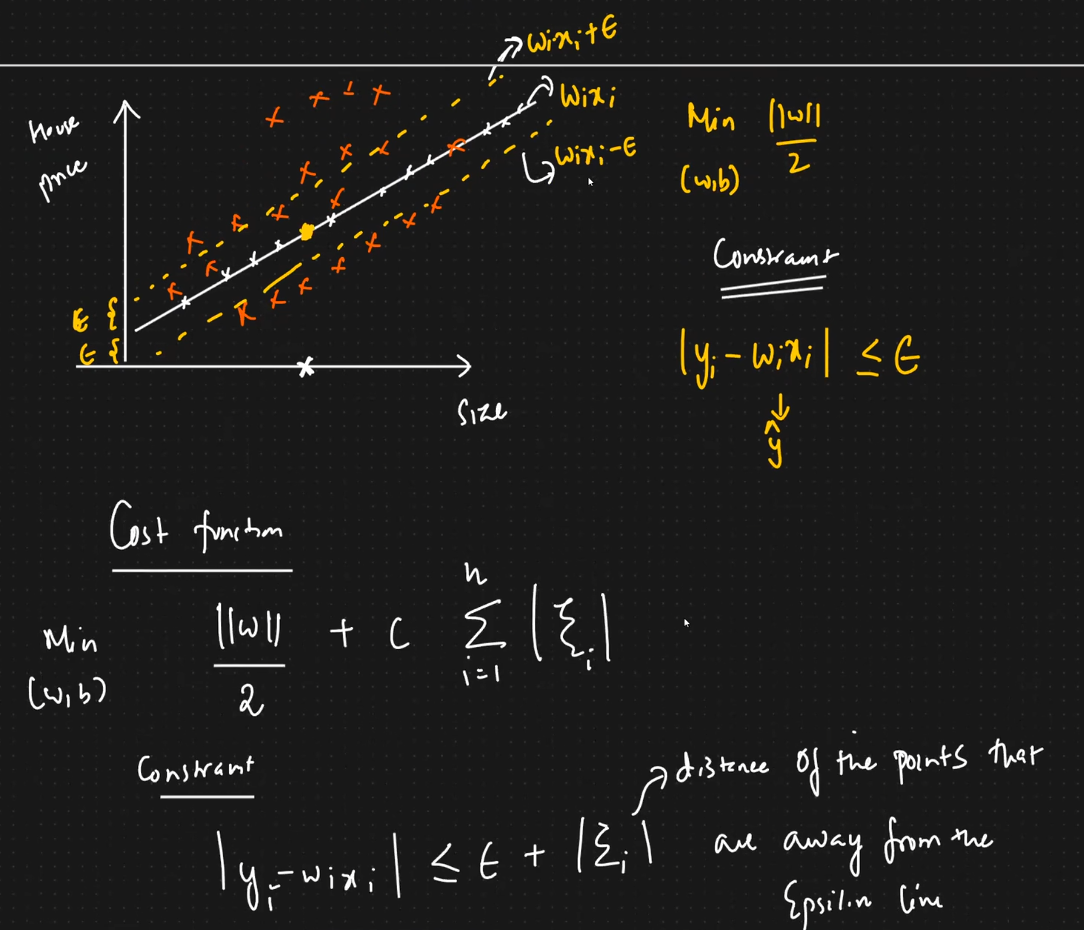

* meaning of epsilon and eta

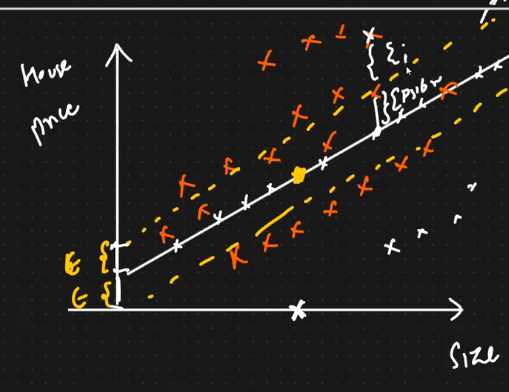

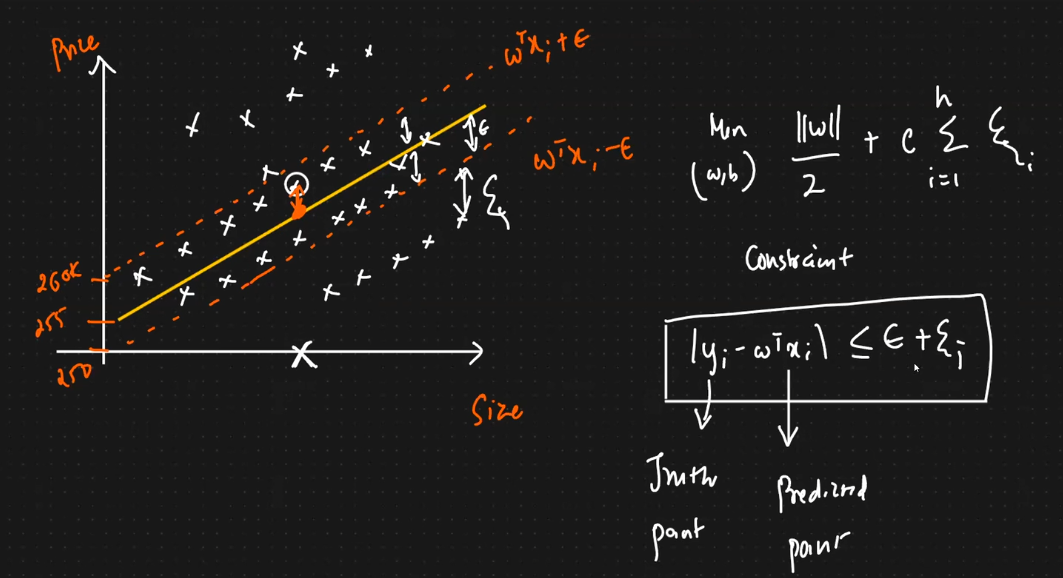

* for linear regression:

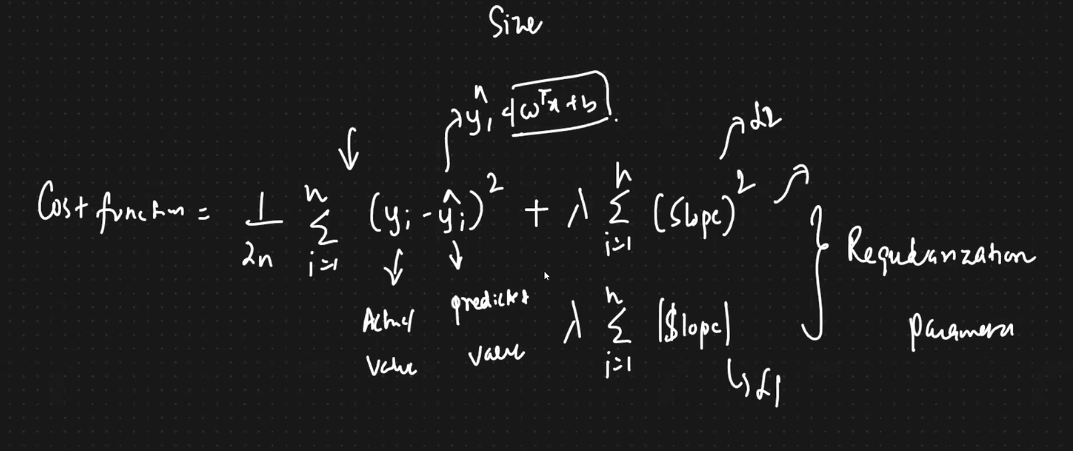

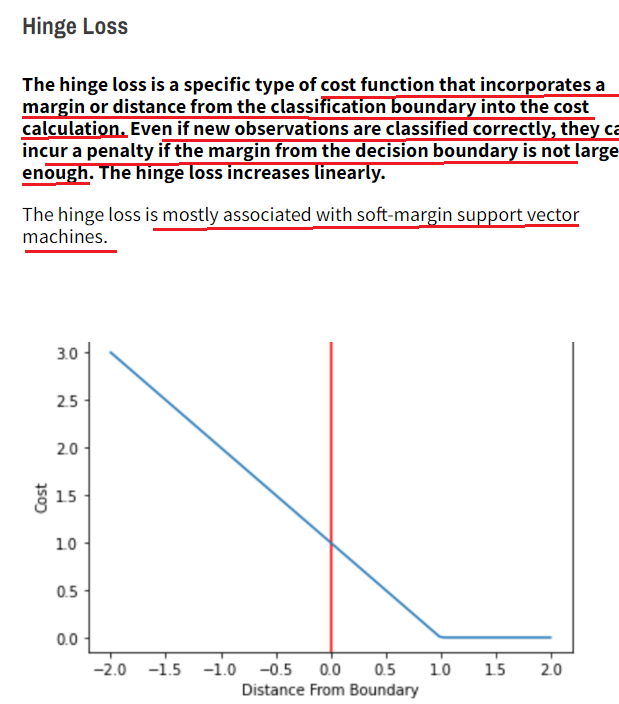

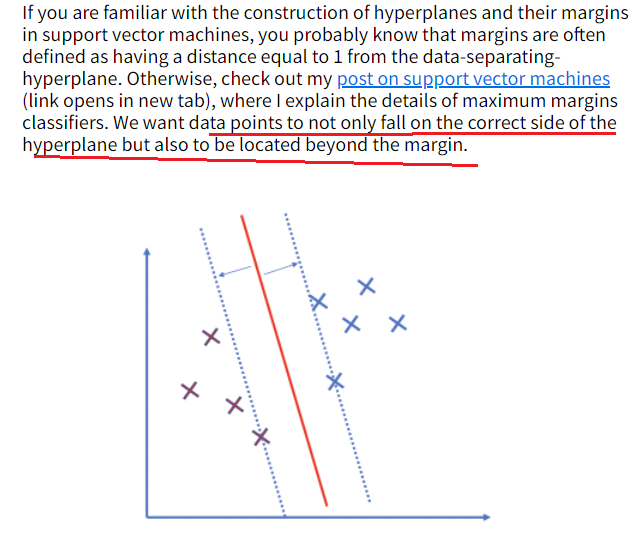

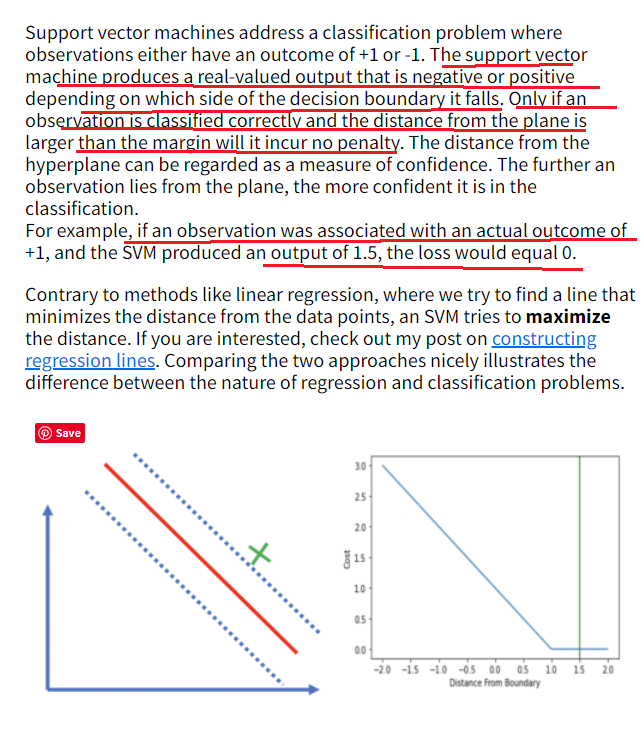

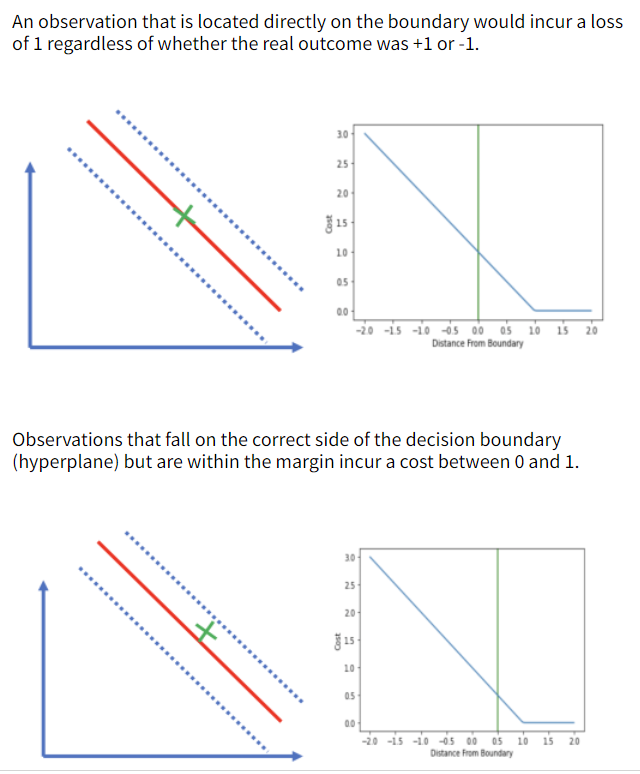

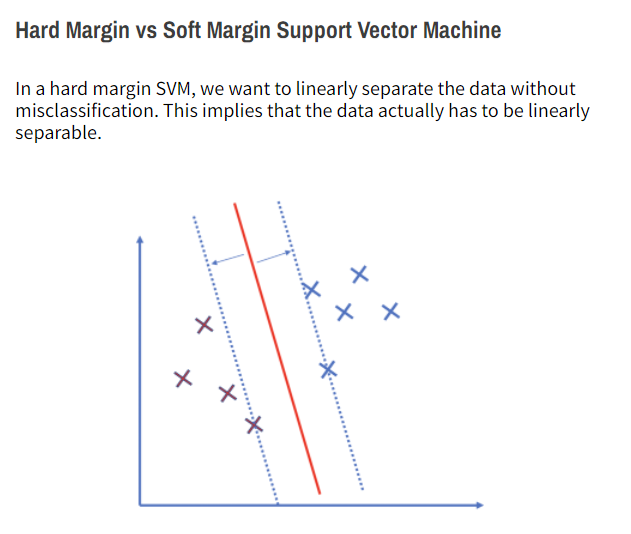

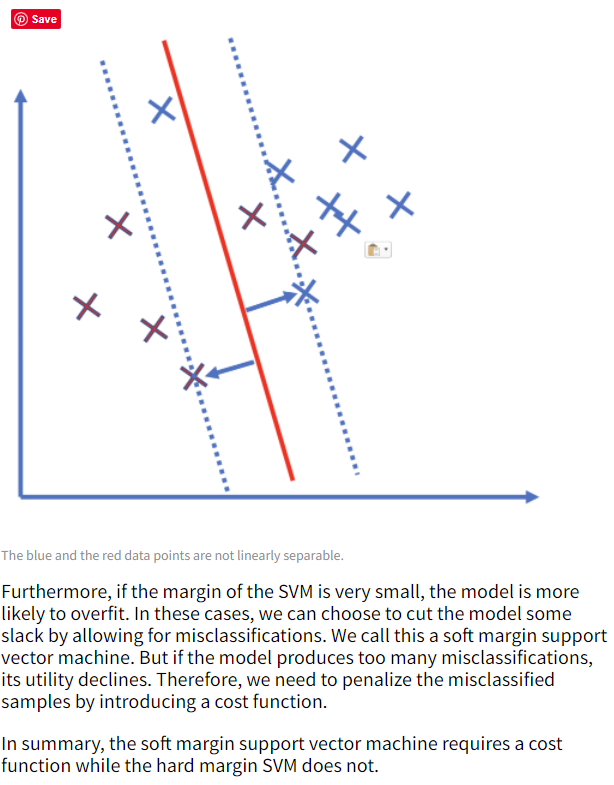

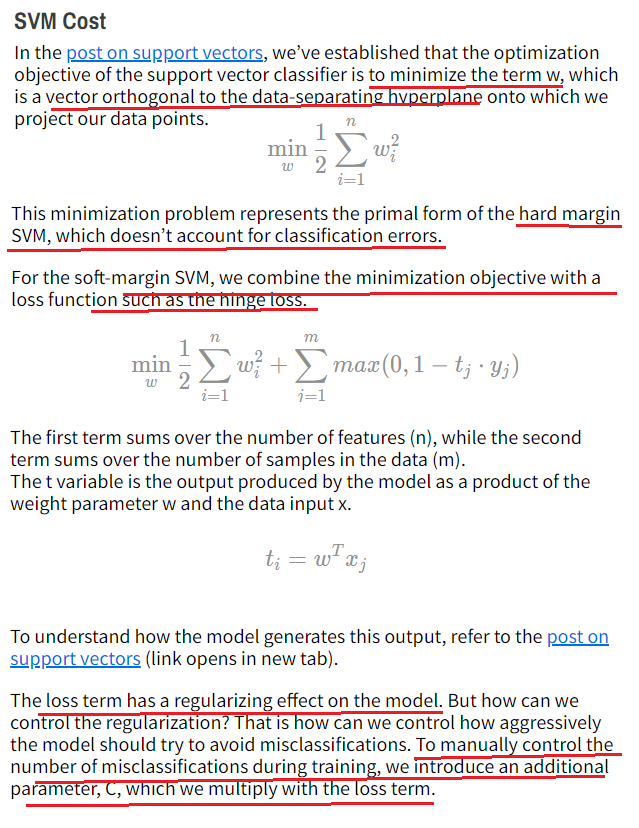

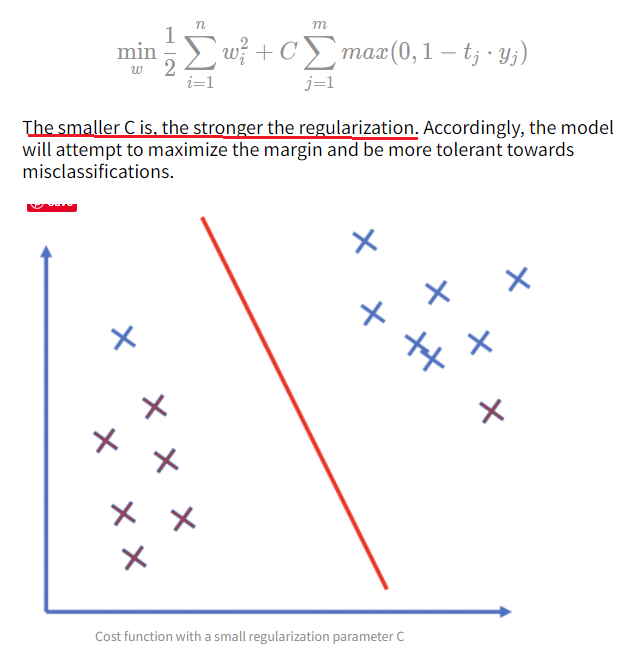

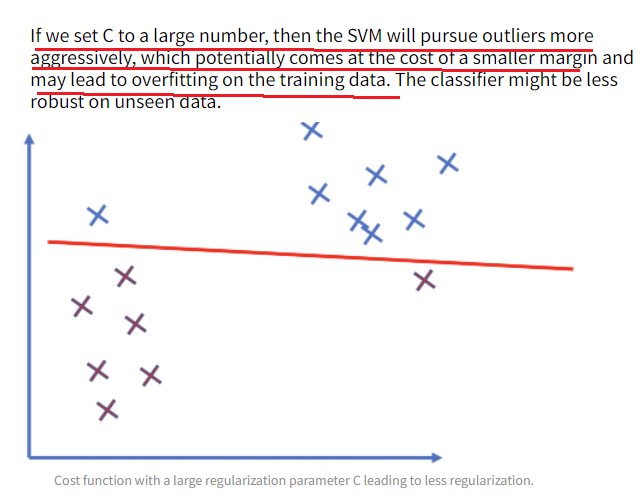

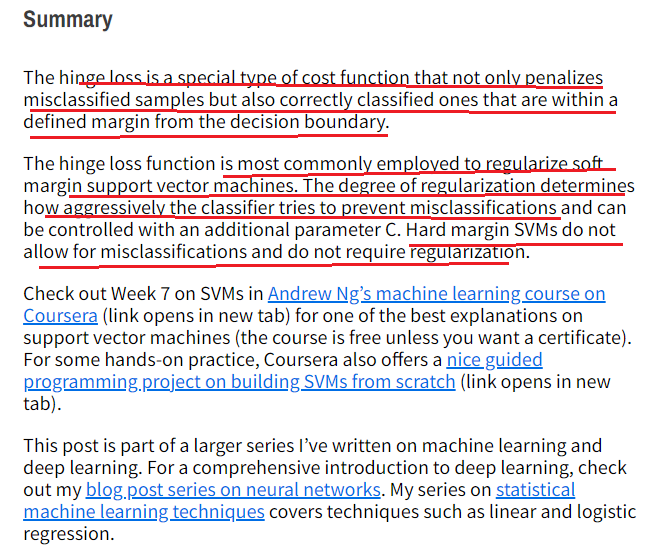

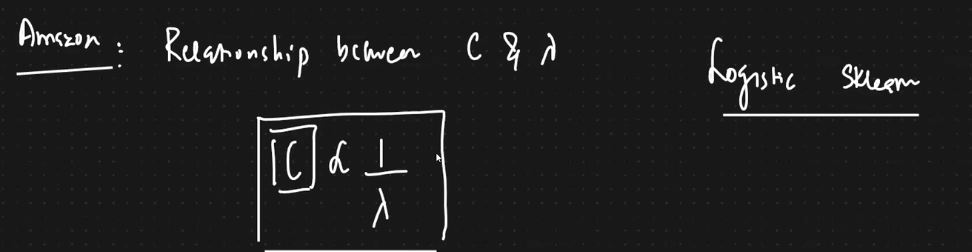

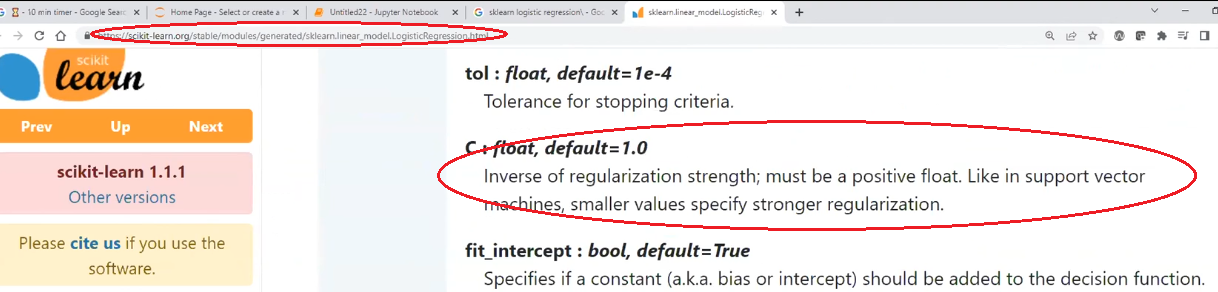

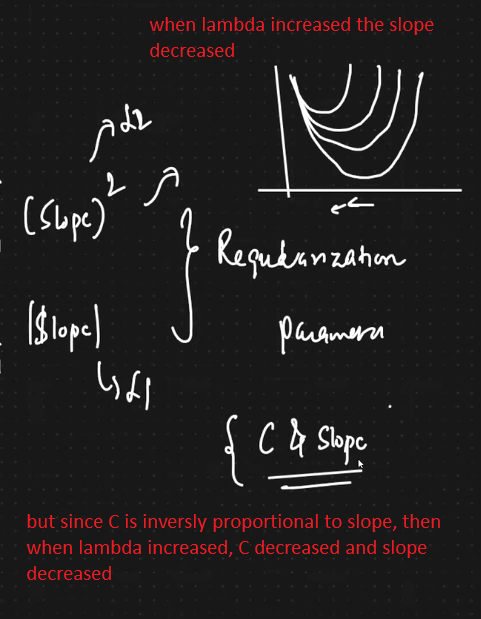

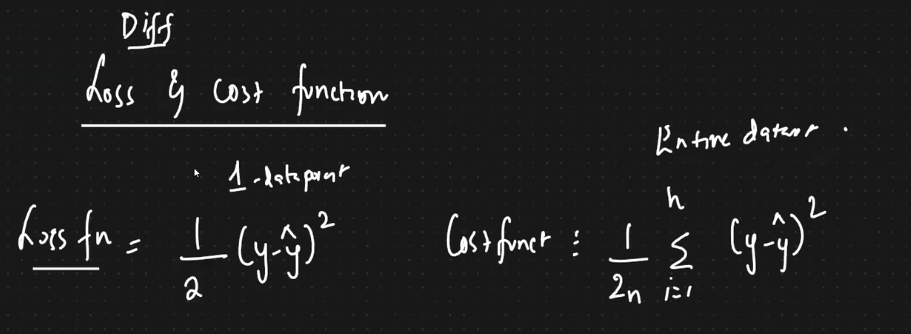

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

In [45]:
df = sns.load_dataset("iris")
df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [46]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [47]:
# to create a binary classification, lets drope one of the variables:
df = df[df.species != "virginica"].copy()
df

sepal_length  sepal_width  petal_length  petal_width     species
0            5.1          3.5           1.4          0.2      setosa
1            4.9          3.0           1.4          0.2      setosa
2            4.7          3.2           1.3          0.2      setosa
3            4.6          3.1           1.5          0.2      setosa
4            5.0          3.6           1.4          0.2      setosa
..           ...          ...           ...          ...         ...
95           5.7          3.0           4.2          1.2  versicolor
96           5.7          2.9           4.2          1.3  versicolor
97           6.2          2.9           4.3          1.3  versicolor
98           5.1          2.5           3.0          1.1  versicolor
99           5.7          2.8           4.1          1.3  versicolor

[100 rows x 5 columns]

In [48]:
df["species"] = df.species.map({"setosa":0,"versicolor":1})

In [49]:
df.species.unique()

array([0, 1], dtype=int64)

In [50]:
# split data
X = df.iloc[:,:-1]
y=df.iloc[:,-1]

In [51]:
X.shape, y.shape

((100, 4), (100,))

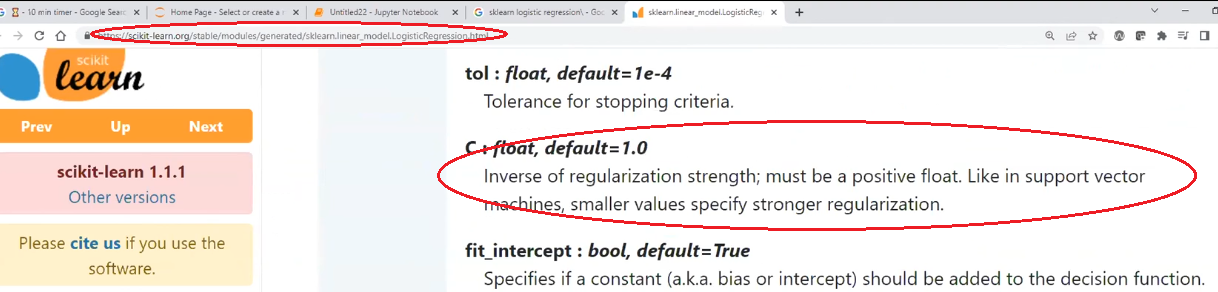

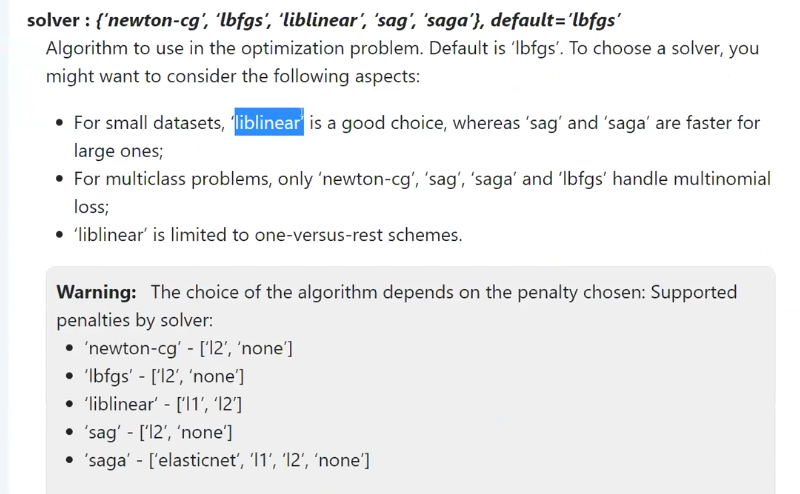

In [52]:
X

sepal_length  sepal_width  petal_length  petal_width
0            5.1          3.5           1.4          0.2
1            4.9          3.0           1.4          0.2
2            4.7          3.2           1.3          0.2
3            4.6          3.1           1.5          0.2
4            5.0          3.6           1.4          0.2
..           ...          ...           ...          ...
95           5.7          3.0           4.2          1.2
96           5.7          2.9           4.2          1.3
97           6.2          2.9           4.3          1.3
98           5.1          2.5           3.0          1.1
99           5.7          2.8           4.1          1.3

[100 rows x 4 columns]

In [53]:
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: species, Length: 100, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((80, 4), (20, 4), (80,), (20,))

In [57]:
from sklearn.linear_model import LogisticRegression

log_regr = LogisticRegression()

In [60]:
from sklearn.model_selection import GridSearchCV

parameters = {"C":[0.5,1,2,3,5,6,7,9,10,30,45],"penalty":["l1","l2","elasticnet"]}
log_regr_grd = GridSearchCV(log_regr, parameters, scoring="accuracy", cv=5)
log_regr_grd.fit(X,y)


C:\Users\rivil\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rivil\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rivil\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rivil\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\rivil\AppData\Roaming\Python\Python36\site-packages\sklearn\model_se

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 3, 5, 6, 7, 9, 10, 30, 45],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [61]:
print(log_regr_grd.best_params_)

{'C': 0.5, 'penalty': 'l2'}


In [62]:
print(log_regr_grd.best_score_)

1.0


In [63]:
y_pred = log_regr_grd.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0],
      dtype=int64)

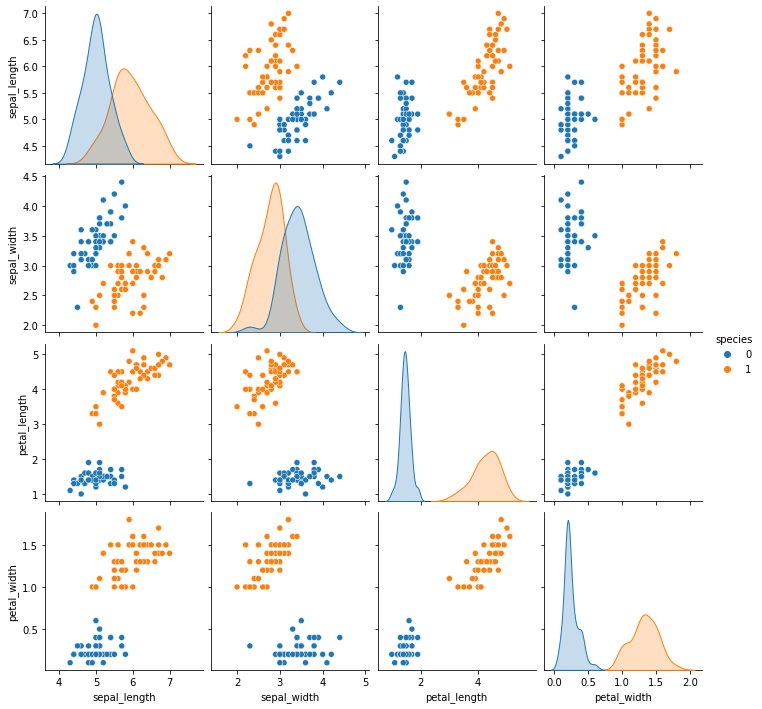

In [72]:
sns.pairplot(df, hue="species")  # we can see really easy separable groups, that is why we are getting such a good score.

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_auc_score, f1_score

In [69]:
confusion_matrix(y_test, y_pred)

array([[12,  0],
       [ 0,  8]], dtype=int64)

In [71]:
f1_score(y_test, y_pred)

1.0